# PMT noise

A NB template to ilustrate how to examine the features of events

In [59]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-05-17 17:24:06


In [60]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import sys
import os
import time
import tables as tb
import numpy as np
import matplotlib.pyplot as plt

In [62]:
from invisible_cities.database import load_db

In [63]:
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.tbl_functions as tbl
from invisible_cities.reco.params import S12Params, ThresholdParams
from   invisible_cities.core.system_of_units_c import units

In [64]:
from invisible_cities.core.mpl_functions import plot_pmt_waveforms, plot_pmt_signals_vs_time_mus, \
              plot_signal_vs_time_mus

In [65]:
from invisible_cities.reco.pmaps_functions import plot_s12

In [66]:
from icaro.core.event_pmaps import EventPmaps, print_s12, print_s2si

### Run Parameters

In [67]:
#run_number = 3628
run_number = 3905
run_number = 3988

In [68]:
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values



In [69]:
DataPMT

,SensorID,ChannelID,PmtID,Active,X,Y,coeff_blr,coeff_c,adc_to_pes,noise_rms,Sigma
0,0,18,PMT1,1,-23.9414,65.7785,0.00080,0.000001,25.67,0.8744,11.24
1,1,22,PMT3,1,-44.9951,-53.6231,0.00080,0.000001,26.47,0.7160,12.21
2,2,19,PMT2,1,68.9365,-12.1554,0.00000,0.000000,28.61,0.0000,10.52
3,3,23,PMT4,1,0.0000,185.0000,0.00080,0.000001,26.15,0.7303,10.01
4,4,9,PMTC,1,-118.9160,141.7180,0.00000,0.000000,27.13,0.0000,9.70
5,5,8,PMTB,1,-182.1890,32.1249,0.00161,0.000003,21.80,0.7278,8.18
6,6,5,PMTA,1,-160.2150,-92.5000,0.00161,0.000003,24.59,0.7323,8.98
7,7,4,PMT9,1,-63.2737,-173.8430,0.00161,0.000003,34.97,0.7206,13.29
8,8,1,PMT8,1,63.2737,-173.8430,0.00162,0.000003,22.23,0.7213,8.32
9,10,31,PMT6,1,182.1890,32.1249,0.00160,0.000003,20.85,0.7000,8.07


In [70]:
RWF_file = os.path.join(os.environ['IC_DATA'],
                        'LSC/wvfms/{}/dst_waves.gdcsnext.000_{}.root.h5'.format(run_number, run_number))
print('RWF file = {}'.format(RWF_file))

RWF file = /Users/alej/Desktop/IC_DATA/LSC/wvfms/3988/dst_waves.gdcsnext.000_3988.root.h5


In [71]:
h5rwf = tb.open_file(RWF_file,'r')

In [72]:
pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5rwf)

In [73]:
NEVT, NPMT, PMTWL = pmtrwf.shape
NEVT, NSIPM, SIPMWL = sipmrwf.shape
print("""
        Number of events in file = {}
        Number of PMTs = {}
        PMTWL = {}
        Number of SiPMs = {}
        SiPMWL = {}
      """.format(NEVT, NPMT, PMTWL,NSIPM, SIPMWL))


        Number of events in file = 170
        Number of PMTs = 12
        PMTWL = 52000
        Number of SiPMs = 1792
        SiPMWL = 1300
      


In [74]:
s1par  = S12Params(tmin=0*units.mus, tmax=620*units.mus, lmin=5, lmax=20, stride=4, rebin=False)
s2par = S12Params(tmin=640*units.mus, tmax=1300*units.mus, stride=80, lmin=80, lmax=20000, rebin=True)
thr    = ThresholdParams(thr_s1=3 * units.pes,  thr_s2=1 *units.pes,
                        thr_MAU = 3 * units.adc, thr_sipm = 3.5 * units.pes,
                        thr_SIPM = 30 * units.adc)

In [75]:
epm = EventPmaps(run_number, s1par, s2par, thr, verbose=True)

In [76]:
event=0
epm.calibrated_pmt_and_csum(event, pmtrwf)

ZeroDivisionError: float division

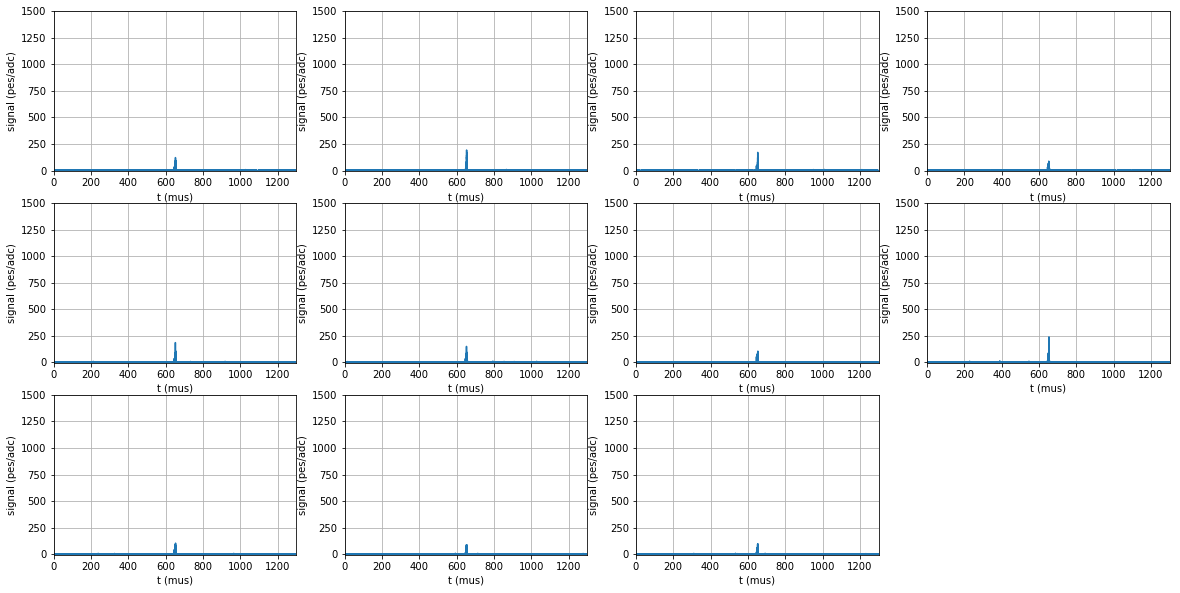

In [47]:
plot_pmt_signals_vs_time_mus(epm.CWF,
                                 epm.P.pmt_active  ,
                                 t_min      =     0,
                                 t_max      =  1300,
                                 signal_min =    -5,
                                 signal_max =  1500, figsize=(20,10))

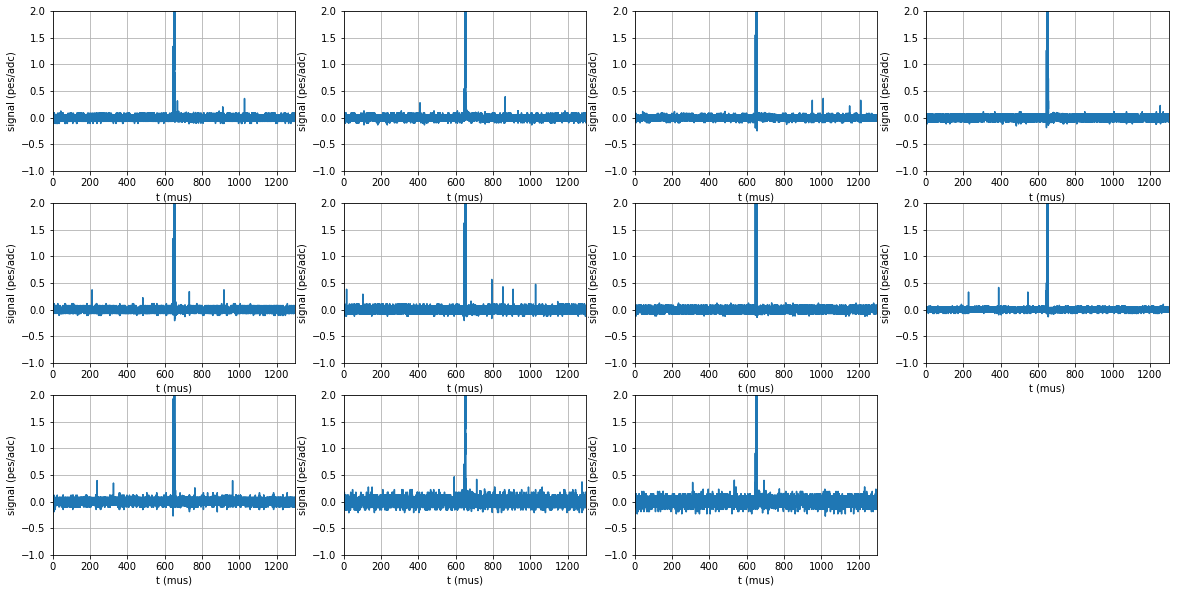

In [48]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                                 epm.P.pmt_active  ,
                                 t_min      =     0,
                                 t_max      =  1300,
                                 signal_min =    -1,
                                 signal_max =  2, figsize=(20,10))

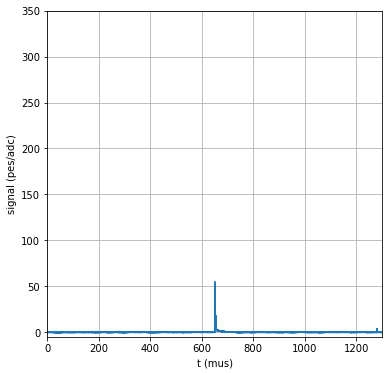

In [94]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=350)

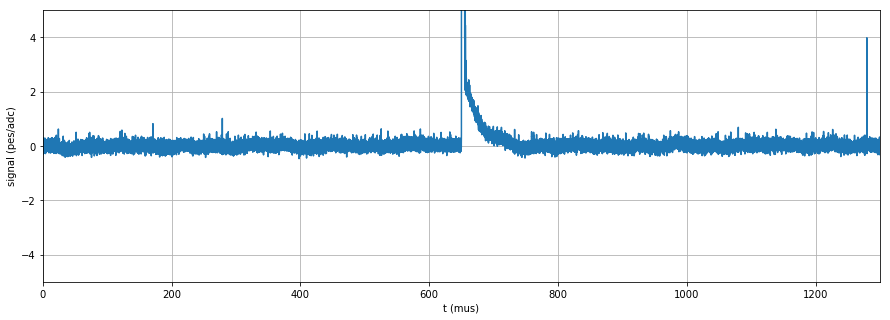

In [95]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=5, figsize=(15,5))

In [96]:
epm.find_s1()

number of peaks = 0


0

In [43]:
epm.find_s2()


number of peaks = 1
S12 number = 0, samples = 92 sum in pes =57397.810390607665
time vector (mus) = [ 649.953125    650.9625      651.9625      652.9625      653.9625
  654.9625      655.9625      656.9625      657.9625      658.9625
  659.9625      660.9625      661.9625      662.9625      663.9625
  664.9625      665.9625      666.9625      667.9625      668.9625
  669.9625      670.9625      671.9625      672.9625      673.9625
  674.9625      675.9625      676.9625      677.9625      678.9625
  679.9625      680.9625      681.9625      682.9625      683.9625
  684.9625      685.9625      686.9625      687.9625      688.9625
  689.9625      690.9625      691.9625      692.9625      693.9625
  694.9625      695.9625      696.9625      697.9625      698.9625
  699.9625      700.9625      701.9625      702.9625      703.9625
  704.9625      705.9625      706.9625      707.9625      708.9625
  709.9625      710.9625      711.9625      712.9625      713.9625
  714.9625      715.9625     

1

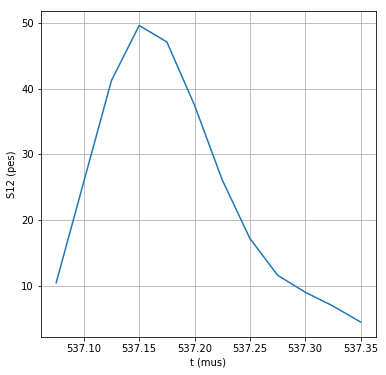

In [105]:
plot_s12(epm.S1)

In [45]:
print(epm.S2[0][1].sum())

57397.8103906


In [106]:
epm.s1f

{0: S12Features(tmin=537075.0, tmax=537350.0, tpeak=537150.0, etot=287.16255346131715, epeak=49.620019757374799, width=275.0)}

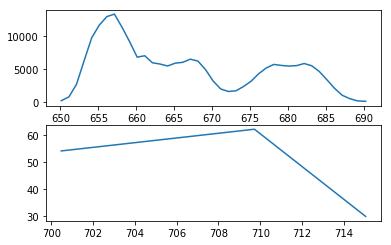

In [107]:
plot_s12(epm.S2)

In [108]:
epm.s2f

{0: S12Features(tmin=650112.5, tmax=690212.93103448278, tpeak=657112.5, etot=206792.95696777356, epeak=13367.398356560359, width=40100.431034482783),
 1: S12Features(tmin=700476.25, tmax=715043.18181818177, tpeak=709721.875, etot=145.78700265007825, epeak=62.020462095571197, width=14566.931818181765)}

In [109]:
epm.find_ns1()

10

In [110]:
dt = epm.s2f[0].tpeak - epm.s1f[0].tpeak

In [111]:
dt/units.mus

119.96250000000001

In [130]:
event=6
epm.calibrated_pmt_and_csum(event, pmtrwf)

106156.00674686572

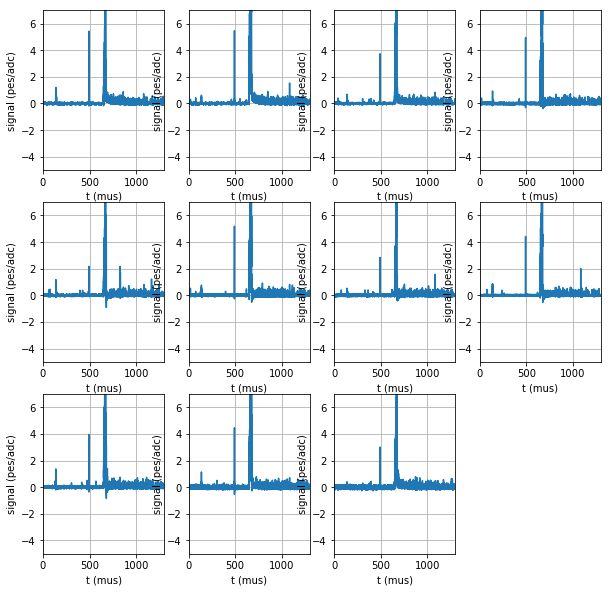

In [131]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  7)

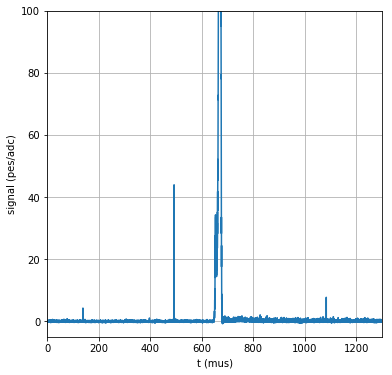

In [132]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=100)

In [133]:
epm.find_s1()
epm.find_ns1()

number of peaks = 2
S12 number = 0, samples = 7 sum in pes =26.246105974621795
time vector (mus) = [ 138.25   138.275  138.3    138.325  138.35   138.375  138.4  ]
energy vector (pes) = [ 3.25844206  3.88502091  4.20116194  4.07818148  3.4613347   3.85529338
  3.50667151]
S12 number = 1, samples = 12 sum in pes =260.4799437214684
time vector (mus) = [ 492.125  492.15   492.175  492.2    492.225  492.25   492.275  492.3
  492.325  492.35   492.375  492.4  ]
energy vector (pes) = [  4.6806039   15.04613764  29.33726576  40.52412668  43.92707723
  39.53960164  31.25301494  22.26838464  14.8983057    9.23163151
   5.99587406   3.77792003]


9

In [134]:
epm.find_s2()

number of peaks = 1
S12 number = 0, samples = 31 sum in pes =103526.03666114509
time vector (mus) = [ 648.70375     649.7625      650.7625      651.7625      652.7625
  653.7625      654.7625      655.7625      656.7625      657.7625
  658.7625      659.7625      660.7625      661.7625      662.7625
  663.7625      664.7625      665.7625      666.7625      667.7625
  668.7625      669.7625      670.7625      671.7625      672.7625
  673.7625      674.7625      675.7625      676.7625      677.7625
  678.84833333]
energy vector (pes) = [    67.47872086    176.81102896    370.4199126     734.21955785
   1008.02091467   1110.46229805   1025.66248302    878.53980842
    741.0633263     828.65517871    886.49069258   1102.17462562
   1307.54366786   1737.03633601   2233.21517375   3500.22032523
   5860.06587335   8829.52505806  10358.39987776  10780.77089479
   9601.23243243   8169.65344535   7614.18571467   7289.01940402
   6376.48351765   4996.77495066   3382.97164517   1627.34712597
    6

1

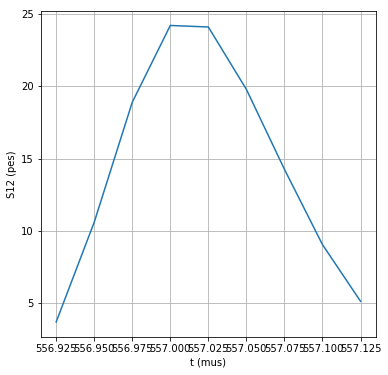

In [117]:
plot_s12(epm.S1)

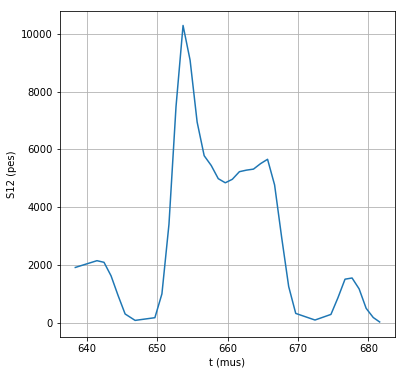

In [118]:
plot_s12(epm.S2)

In [119]:
epm.s1f

{0: S12Features(tmin=556925.0, tmax=557125.0, tpeak=557000.0, etot=129.74982592845237, epeak=24.205077544941336, width=200.0)}

In [120]:
epm.s2f

{0: S12Features(tmin=638386.25, tmax=681605.0, tpeak=653687.5, etot=115782.60591064629, epeak=10287.786869198941, width=43218.75)}

In [170]:
def pmp(epm, event):
    epm.calibrated_pmt_and_csum(event, pmtrwf)
    
    plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60, figsize=(4,4))

    plt.show()

        
    print('+++S1+++++')
    epm.find_s1()
    if len (epm.S1) == 0:
        print('S1 == 0')
        return 0
    
    plot_s12(epm.S1, figsize=(5,5))
    plt.show()
    

    print('+++S2+++++')
    epm.find_s2()
    plot_s12(epm.S2, figsize=(5,5))
    plt.show()
    
    print('s1f = {} '.format(epm.s1f[0]))
    for peak in epm.s2f:
        print('s2f = {} '.format(epm.s2f[peak]))
        dt = epm.s2f[peak].tpeak - epm.s1f[0].tpeak
        print('dt = {} mus'.format(dt/units.mus))
    

In [124]:
def pmp_plot(epmx):
    plot_pmt_signals_vs_time_mus(epmx.CAL_PMT,
                             epmx.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  10, figsize=(4,4))
    plt.show()
    plot_signal_vs_time_mus(epmx.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60,figsize=(4,4))
    plt.show()
    plot_s12(epmx.S1)
    plt.show(
    plot_s12(epmx.S2))
    plt.show()

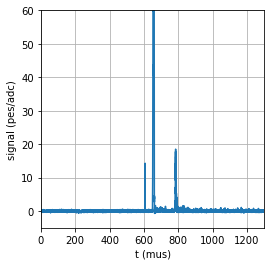

+++S1+++++
number of peaks = 1
S12 number = 0, samples = 7 sum in pes =67.98757874727912
time vector (mus) = [ 606.575  606.6    606.625  606.65   606.675  606.7    606.725]
energy vector (pes) = [  6.08899448  10.69903827  14.06385231  14.2875479   11.50971637
   7.36478189   3.97364753]


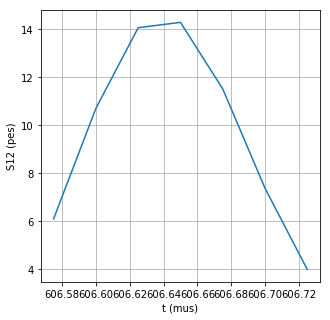

+++S2+++++
number of peaks = 2
S12 number = 0, samples = 12 sum in pes =54919.03718187776
time vector (mus) = [ 650.3725  651.3875  652.3875  653.3875  654.3875  655.3875  656.3875
  657.3875  658.3875  659.3875  660.3875  661.4525]
energy vector (pes) = [   236.3381609    1233.0779551    2160.43447603   3022.69212614
   4981.29536507   8039.91007587  10657.53448527  12572.11182535
   8511.19071355   3045.48027831    442.2314736      16.74024668]
S12 number = 1, samples = 11 sum in pes =2989.889127639504
time vector (mus) = [ 780.656875  781.6875    782.6875    783.6875    784.6875    785.6875
  786.6875    787.6875    788.6875    789.821875  791.78125 ]
energy vector (pes) = [  89.61950071  201.29241663  382.80136324  547.77826354  530.56138185
  447.14578474  282.19163948  233.64876161  163.02632693   76.45425121
   35.3694377 ]


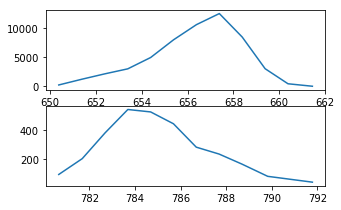

s1f = S12Features(tmin=606575.0, tmax=606725.0, tpeak=606650.0, etot=67.987578747279116, epeak=14.287547901930552, width=150.0) 
s2f = S12Features(tmin=650372.5, tmax=661452.5, tpeak=657387.5, etot=54919.037181877757, epeak=12572.111825350119, width=11080.0) 
dt = 50.7375 mus
s2f = S12Features(tmin=780656.875, tmax=791781.25, tpeak=783687.5, etot=2989.8891276395038, epeak=547.77826354408478, width=11124.375) 
dt = 177.0375 mus


In [178]:
pmp(epm,event=37)

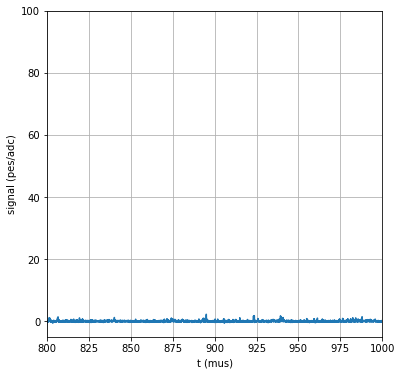

In [161]:
event=26
epm.calibrated_pmt_and_csum(event, pmtrwf)
plot_signal_vs_time_mus(epm.csum, 
                            t_min=800, 
                            t_max=1000, 
                            signal_min=-5, 
                            signal_max=100)

In [ ]:
pmp(epm,event=5)

In [ ]:
pmp(epm,event=6)

In [ ]:
pmp(epm,event=8)

In [ ]:
pmp(epm,event=9)